# Overview:

This is a visual exploration of the overall data, before delving into the next steps of recommendation engine, clustering music critics, and modelling album feature preferences. 

However, an interesting narrative already emerges about the dataset. Pitchfork’s data looks fairly clean and unbiased – there may have even been deliberate steps taken to ensure, for example, that reviews are published on a consistent basis throughout the year, and years and ratings are not affected by the time of year the review is published (1.1, 1.4). 

Additionally, ratings are distributed in a well-balanced fashion that fits nearly perfectly into a normal distribution curve (1.2). There is also a reasonable representation of music critic experience on the Pitchfork team (2.1), although the majority of critics had only been reviewing for Pitchfork for < 2 years (2.2).

Unfortunately, album genre from Spotify features was not available for any of the albums reviewed. An interesting relationship could be the types of genres music critics tended to review. However, with the next step of analysis (clustering, modelling album features vs. critics’ ratings), such relationships may be more apparent. 

<b> More details (i.e. responses to assignment questions)</b>: 

https://docs.google.com/document/d/1ndj1bCQwBDbp2Xy3vebKxUdBasZdMf1E0eYL7L4i_Pc/edit?usp=sharing

# Contents:
#### 1. Reviews & ratings
- 1.1 When do reviews tend to be published?
- 1.2 Distribution of album ratings
- 1.3 Album ratings over time
- 1.4 Rating vs. Month

#### 2. Music critics
- 2.1 How many reviews have critics written?
- 2.2 How many years as a critic?
- 2.3 Experienced critics tend towards narrower ratings
- 2.4 Ratings vs. Album Popularity

#### 3. Album Features
- 3.1 Album popularity
- 3.2 Correlations between features & features vs. ratings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
from scipy import stats

%matplotlib inline
mpl.rcParams['patch.force_edgecolor'] = True
sns.set()

#### Import data

Relevant dataframes from data wrangling notebook (DataCleaning/data_wrangling.ipynb) are imported via pickle files, rather than csv files, because it was found that some data structures/organization was altered in the process of dataframe > csv > dataframe.

In [2]:
df_pitchfork_spotify = pd.read_pickle('df_pitchfork_spotify.pkl')
df_pitchfork_spotify.head(3)

,album,artist,reviewid,score,spotify_album_id,album_tracks,album_features,album_features_avg,album_trackcount,album_popularity,album_genres
0,mezzanine,massive attack,22703,9.3,49MNmJhZQewjt06rpwp6QR,"[Angel, Risingson, Teardrop, Inertia Creeps, E...","[{'danceability': 0.714, 'energy': 0.309, 'key...","{'danceability': 0.6041818181818182, 'energy':...",11,64,[]
1,prelapsarian,krallice,22721,7.9,264k3RcZ8BGWTc1TlH8gvs,"[Transformation Chronicles, Hate Power, Confla...","[{'danceability': 0.108, 'energy': 0.806, 'key...","{'danceability': 0.131, 'energy': 0.867, 'key'...",4,10,[]
2,all of them naturals,uranium club,22659,7.3,5M3Cx38HT8sD8ulnrSZsXi,"[Introduction, That Clown's Got A Gun, The Lot...","[{'danceability': 0.613, 'energy': 0.85, 'key'...","{'danceability': 0.44499999999999995, 'energy'...",8,28,[]


In [3]:
df_pitchfork = pd.read_pickle('df_pitchfork.pkl')
df_pitchfork.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,kleenex,http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [4]:
df_authors_reviews = pd.read_pickle('df_authors_reviews.pkl')
df_authors_reviews.head()

,author_fullname,reviews
0,aaron leitko,"[21950, 21820, 21753, 21622, 21572, 21283, 213..."
1,abigail covington,"[22138, 21544]"
2,abigail garnett,"[21050, 20968, 20694, 20570, 20405, 20134, 199..."
3,adam dlugacz,[6794]
4,adam moerder,"[13207, 13007, 12956, 12939, 12861, 12673, 126..."


# 1. Reviews & ratings

An overview of review data from the Pitchfork database to check for any biases, anomalies, etc.

### 1.1 When do reviews tend to be published?

Checking whether there is bias in when reviews are released/written. 
- Generally appears to be little to none, with the exception of a noticeable lull in December when critics are probably on holidays. 
- After an initial period of growth in Pitchfork's early years 1999-2002, the number of reviews published each year is also consistent.

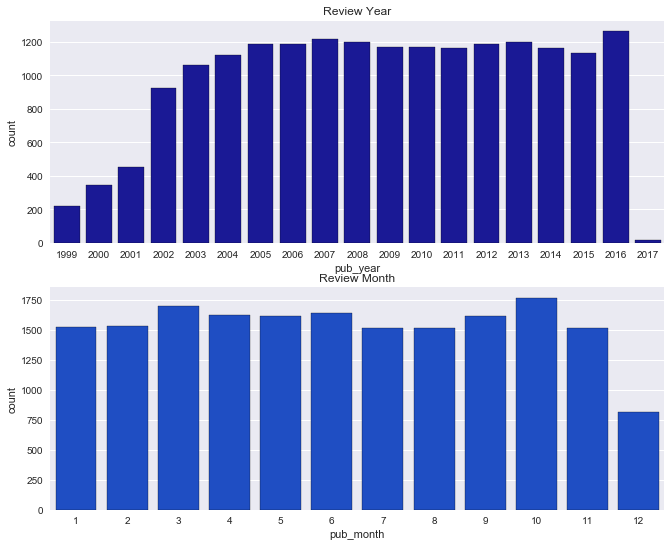

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11,9))
sns.countplot(x='pub_year', data=df_pitchfork, color = sns.xkcd_rgb['royal blue'],  ax=ax1).set_title('Review Year');
sns.countplot(x='pub_month', data=df_pitchfork, color = sns.xkcd_rgb['blue'], ax=ax2).set_title('Review Month');

### 1.2 Distribution of album ratings

Checking for skew in ratings that music critics gave to albums. 
- Distribution is fairly normal with left skew.

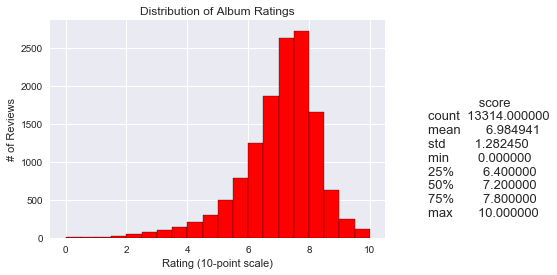

In [6]:
df = pd.DataFrame(df_pitchfork_spotify['score'])
ax = plt.hist(df['score'], bins=20, color= 'r');
plt.xlabel('Rating (10-point scale)')
plt.ylabel('# of Reviews')
plt.title('Distribution of Album Ratings');
plt.figtext(1.0, 0.2, df.describe(), fontsize=13);

### 1.3 Album ratings over time

Do the album ratings that critics award change over time?
- Lots of variability between early years
- Upward trend in later years

In [12]:
# make a dataframe of album review date & rating received

dates = [] # year album was rated
for review in df_pitchfork_spotify['reviewid']:
    df = df_pitchfork[df_pitchfork['reviewid']==review]
    dates.append(df['pub_year'].values[0])

df1 = pd.DataFrame({'dates':dates, 'scores': df_pitchfork_spotify['score']})
df2 = pd.DataFrame([df1[df1['dates']==year].mean() for year in df1['dates'].unique()])

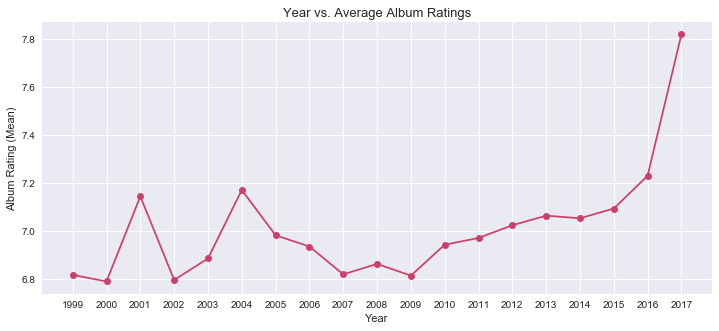

In [13]:
# make a time series

plt.figure(figsize = (12,5))
plt.plot(df2['dates'], df2['scores'], '-o', color= sns.xkcd_rgb['dark pink']);
plt.xticks(df2['dates'])
plt.xlabel('Year');
plt.ylabel('Album Rating (Mean)');
plt.title('Year vs. Average Album Ratings', fontsize=13);

### 1.4 Rating vs. Month

Does the rating change depending on the time of year the review is published?
- Seems to stay fairly consistent

In [14]:
month = []
for review in df_pitchfork_spotify['reviewid']:
    df = df_pitchfork[df_pitchfork['reviewid']==review]
    month.append(df['pub_month'].values[0])
df1 = pd.DataFrame({'month':month, 'scores': df_pitchfork_spotify['score']})

# taking average rating per month
month_mean = df1.groupby('month').mean()

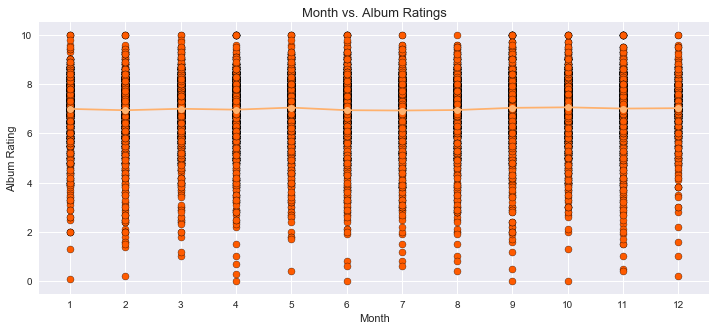

In [15]:
# scatterplot
plt.figure(figsize = (12,5))
plt.scatter(month, df_pitchfork_spotify['score'], color = sns.xkcd_rgb['bright orange'], edgecolor = 'black')

# overlay mean line plot
plt.plot(month_mean, '-o', color= sns.xkcd_rgb['apricot']);
plt.xticks(list(month_mean.index))
plt.xlabel('Month');
plt.ylabel('Album Rating');
plt.title('Month vs. Album Ratings', fontsize=13);

# 2. Music critics

Examining critic backgrounds, such as the number of reviews they've written and years experience writing reviews for Pitchfork.

### 2.1 How many reviews have critics written?

In [16]:
df_authors_reviews.head()

,author_fullname,reviews
0,aaron leitko,"[21950, 21820, 21753, 21622, 21572, 21283, 213..."
1,abigail covington,"[22138, 21544]"
2,abigail garnett,"[21050, 20968, 20694, 20570, 20405, 20134, 199..."
3,adam dlugacz,[6794]
4,adam moerder,"[13207, 13007, 12956, 12939, 12861, 12673, 126..."


In [17]:
# Generating categories of critics by how many reviews they've written (i.e. experience)

num_reviews = []
for index, row in df_authors_reviews.iterrows():
    num_reviews.append(len(row['reviews']))
    
df_authors_reviews['num_reviews'] = num_reviews

num_review_1 = sum(num == 1 for num in num_reviews)
num_review_5 = sum(num <= 5 and num > 1 for num in num_reviews)
num_review_20 = sum(num <= 20 and num > 5 for num in num_reviews)
num_review_50 = sum(num <= 50 and num > 20 for num in num_reviews)
num_review_300 = sum(num <= 300 and num > 50 for num in num_reviews)
num_review_1000 = sum(num > 300 for num in num_reviews)

labels = ['n = 1','1 < n < 5', '5 < n < 20', '20 < n < 50', '50 < n < 300', 'n > 300']

# Appending this new info to the authors/reviews dataframe

df_authors_reviews['num_reviews'] = num_reviews

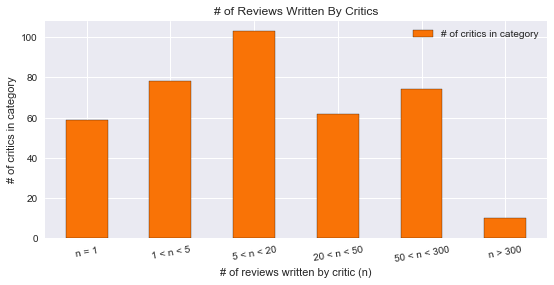

In [19]:
a = pd.DataFrame(
    {'# of reviews written by critic (n)': labels,
     '# of critics in category': [num_review_1, num_review_5, num_review_20, num_review_50, num_review_300, num_review_1000]})

ax = a.plot(kind='bar', figsize=(9,4), color = sns.xkcd_rgb['orange'])
ax.set_xticklabels(labels, rotation=10);
plt.xlabel('# of reviews written by critic (n)')
plt.ylabel('# of critics in category')
plt.title('# of Reviews Written By Critics');

### 2.2 How many years as a critic?

More specifically, examining the number of years that the critics have been reviewing albums for Pitchfork. This is taken to be the time difference between their most recent and earliest review.
- Many of the critics have been reviewing for Pitchfork < 5 years
- Majority are "new" critics - reviewing for < 1 year

In [20]:
# Extract num years critics have been reviewing for Pitchfork

years_exp = []
ratings_mean = []
for index, row in df_authors_reviews.iterrows():
    
    reviews = row['reviews']
    years = []
    ratings = []
    for review_id in reviews:
        years.append(df_pitchfork[df_pitchfork['reviewid'] == review_id]['pub_year'].values[0])
        ratings.append(df_pitchfork[df_pitchfork['reviewid'] == review_id]['score'].values[0])
    
    years_exp.append(max(years) - min(years))
    ratings_mean.append(sum(ratings)/len(ratings))

df_authors_reviews['years_experience'] = years_exp
df_authors_reviews['ratings_mean'] = ratings_mean

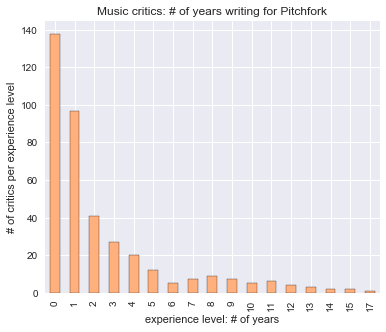

In [21]:
# Plot results

df = pd.DataFrame(years_exp)
df.groupby(0).size().plot(kind='bar', color=sns.xkcd_rgb['peach'], figsize=(6,5));
plt.xlabel('experience level: # of years');
plt.ylabel('# of critics per experience level');
plt.title('Music critics: # of years writing for Pitchfork');

### 2.3 Experienced critics tend towards narrower ratings

Checking whether the number of years a critic has been reviewing for Pitchfork (i.e. "experience") correlates with average rating they give to an album.

- <b>Trend.</b> No significance for trend between critic experience (num of reviews) vs. ratings (pval = 0.71).
- <b>Experience clusters.</b> Experienced critics' ratings (beginning around 50-100 reviews) have less variability with each other than those who have only written a few ratings up to 2017. Greater # of albums rated could narrow the average, or point scales become finer among experienced critics.
- <b>Rating scale interpretation could vary.</b> In addition to the effect of # of albums (calculated in the average) affecting variability, high variability in ratings among inexperienced critics could signal more variable interpretation of Pitchfork's 10-point scale or a need to write reviews with more dramatic ratings. <b><i>(next section: test this hypothesis)

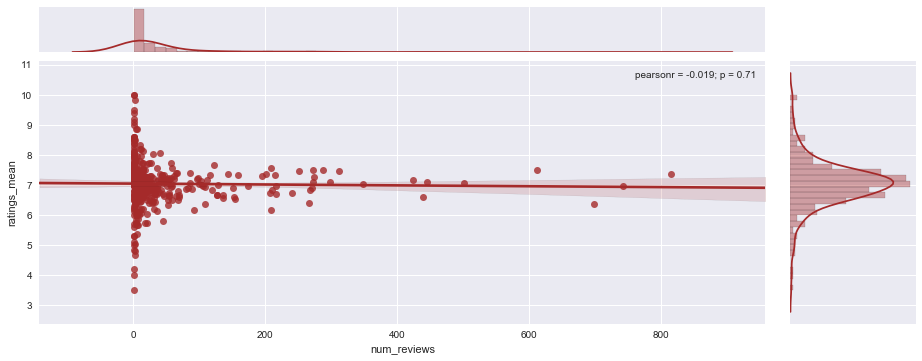

In [22]:
g= sns.jointplot(x='num_reviews', y='ratings_mean', data=df_authors_reviews, color='brown', kind='reg')
g.fig.set_size_inches(14,5)

### 2.4 Does experience affect rating variability?

Following from observations that among less experienced critics there may be higher variability between ratings, we conduct a linear fit between experience (num reviews) and variance within the population of critics belonging to this experience level and below. 
- For lesser-experienced critics, lower review count has higher rating variance. So low reviews sample size for less-experienced critics could contribute to higher variation in their ratings.

In [27]:
# function to output ratings variance belonging to lesser-experienced critics

def experience_var(experience_criteria): # 'experience_criteria' = boundary we are setting "less experienced" critic as)
    
    ratings = [df_authors_reviews['ratings_mean'].loc[i] 
               for i in df_authors_reviews.index 
               if df_authors_reviews['years_experience'].loc[i] <= experience_criteria]
    variance = np.var(ratings)
    
    return variance

#### Plot experience vs. rating variance for up to 50 reviews-experience

In [41]:
# calculate ratings variance for each experience level
v = []
for i in range(50):
    v.append(experience_var(i))

# combine data into dataframe for plotting
data = pd.DataFrame({'experience': list(range(50)), 'variance': v})

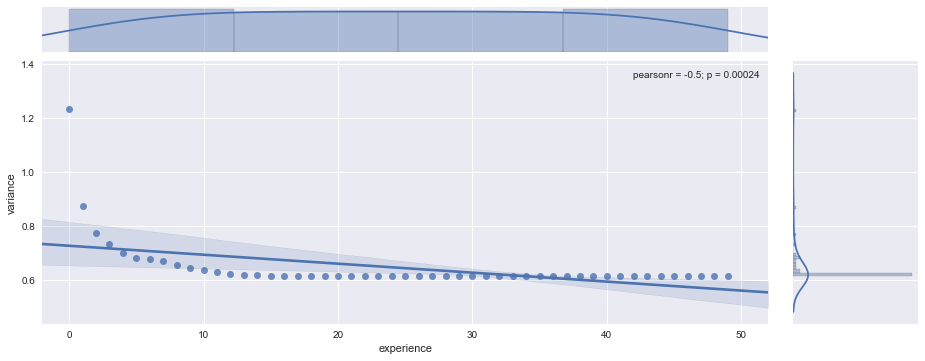

In [42]:
g = sns.jointplot(x='experience', y='variance', data=data, kind='reg', xlim=(-2,52));
g.fig.set_size_inches(14,5)

In [25]:
df_authors_reviews.head()

,author_fullname,reviews,num_reviews,years_experience,ratings_mean
0,aaron leitko,"[21950, 21820, 21753, 21622, 21572, 21283, 213...",97,9,7.197938
1,abigail covington,"[22138, 21544]",2,0,7.050000
2,abigail garnett,"[21050, 20968, 20694, 20570, 20405, 20134, 199...",9,1,7.088889
3,adam dlugacz,[6794],1,0,6.300000
4,adam moerder,"[13207, 13007, 12956, 12939, 12861, 12673, 126...",209,4,6.151675


### 2.4 Ratings vs. Album Popularity

Does streaming popularity relate to how music critics rate an album? Probably not

<i><b>Popularity</b> (Spotify definition): The popularity of the album. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated from the popularity of the album’s individual tracks.

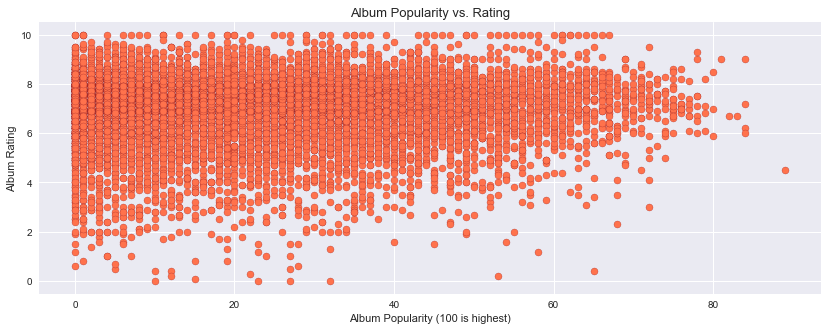

In [79]:
x = df_pitchfork_spotify['album_popularity']
y = df_pitchfork_spotify['score']

plt.figure(figsize=(14,5))
plt.scatter(x,y, color=sns.xkcd_rgb['pinkish orange'], edgecolor='brown');
plt.xlabel('Album Popularity (100 is highest)');
plt.ylabel('Album Rating');
plt.title('Album Popularity vs. Rating', fontsize=13);

The high density of points obfuscates data density, so generate heatmap of data density as well:

Slope:  0.0015782055185506799
R value:  0.02196476852208897
P value:  0.011260750328461825


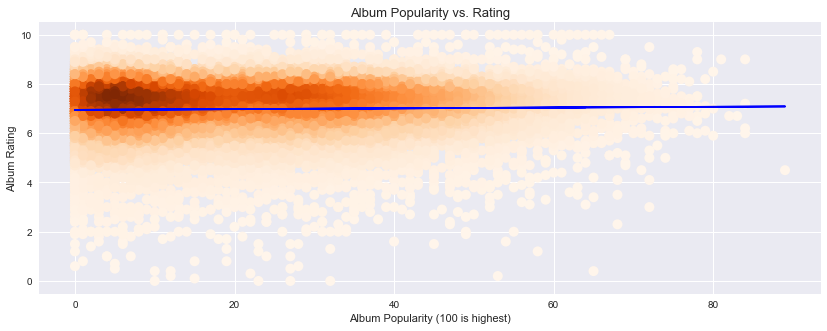

In [69]:
from scipy.stats import gaussian_kde

# plot heatmap

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize=(14,5))
ax.scatter(x, y, c=z, s=100, edgecolor='', cmap='Oranges')

# overlay trend line

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)
plt.plot(x, x*slope + intercept, color='blue');
plt.xlabel('Album Popularity (100 is highest)');
plt.ylabel('Album Rating');
plt.title('Album Popularity vs. Rating', fontsize=13);
print('Slope: ', slope)
print('R value: ', rvalue)
print('P value: ', pvalue)

<b>Observations:</b>
- Many album ratings definitely around 6-8, as expected from rating analyses.
- For linear fit, there's a barely significant P-value of 0.011, which would fail alpha = 0.01, but pass alpha = 0.05. 
- The correlation is also very weak (R = 0.02, Slope = 0.0016). 

<b>Conclusion:</b> Streaming popularity probably doesn't affect by much the rating a critic assigns an album, if at all beyond chance.

# 3. Album Features

### 3.1 Album popularity

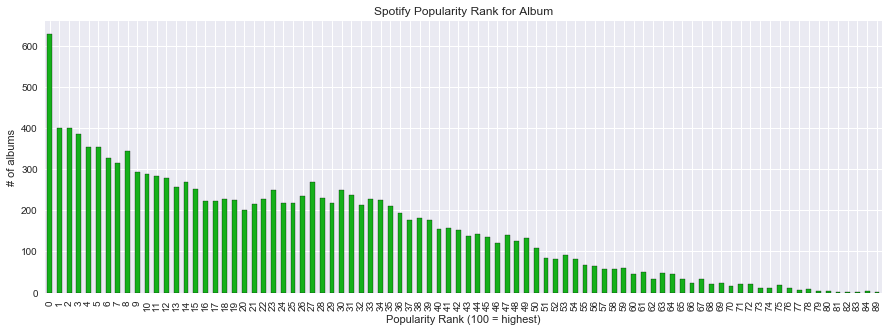

In [81]:
df = pd.DataFrame(df_pitchfork_spotify['album_popularity'])
df.groupby('album_popularity').size().plot(kind='bar', figsize=(15,5), color=sns.xkcd_rgb['green'])
plt.xlabel('Popularity Rank (100 = highest)');
plt.ylabel('# of albums');
plt.title('Spotify Popularity Rank for Album');

### 3.2 Correlations between features & features vs. ratings

Investigating correlations between album feature scores and the rating it received by Pitchfork critics.

#### Set up dataframe for doing an sns.PairGrid

sns.PairGrid is a subplot grid for plotting pairwise relationships in a dataset. Useful for doing simultaneous correlations between Spotify features & ratings

In [82]:
# Extract info

ratings_series = df_pitchfork_spotify['score']
features_series = df_pitchfork_spotify['album_features_avg'] # list of nested features dicts

In [83]:
# Set up dict, where key = Spotify features, values = list of specific features' scores for each rated album

from collections import defaultdict

features_dict = defaultdict(list)
features_list = features_series[0].keys() # features keys in nested features dict

for index, value in features_series.iteritems():
    
    for feature_key in features_list: # iterate through each feature
        
        if feature_key not in features_dict:
            features_dict[feature_key] = [value[feature_key]]
            continue
        
        if pd.isnull(value): # some albums don't actually have Spotify feature analysis
            features_dict[feature_key].append(np.nan)
        else:
            features_dict[feature_key].append(value[feature_key])

In [84]:
df_features = pd.DataFrame(features_dict)
df_features['score'] = ratings_series
df_features['popularity'] = df_pitchfork_spotify['album_popularity']
df_features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,score,popularity
0,0.102768,0.604182,347475.181818,0.536727,0.608818,6.000000,0.116027,-11.009455,0.363636,0.044555,126.181000,4.000000,0.360009,9.3,64
1,0.000014,0.131000,522000.000000,0.867000,0.702750,5.500000,0.371000,-10.062500,1.000000,0.079100,125.417250,3.750000,0.097450,7.9,10
2,0.239874,0.445000,175396.375000,0.675250,0.253252,5.250000,0.171575,-7.417625,0.500000,0.206762,108.224250,3.875000,0.498125,7.3,28
3,0.017701,0.550286,236645.714286,0.558857,0.689114,5.428571,0.397857,-11.079286,0.571429,0.128057,128.852000,4.142857,0.367200,8.1,14
4,0.246144,0.592533,177869.800000,0.650400,0.094776,4.666667,0.209727,-8.356867,0.533333,0.118933,124.510467,3.866667,0.487267,7.1,46


#### Generating pairgrid to examine correlations between all features, as well as features & ratings

Pairgrid figure is massive, so recommend downloading it and zooming in. Despite unwieldy appearance, actually pretty handy to eyeball potential trends among a large number of features.
- A quick run through figures relating Spotify features vs. ratings makes it apparent that there may not be any significant influence of features on ratings and popularity.
- Pitchfork reviews are diverse; a large range of different album features are well-represented

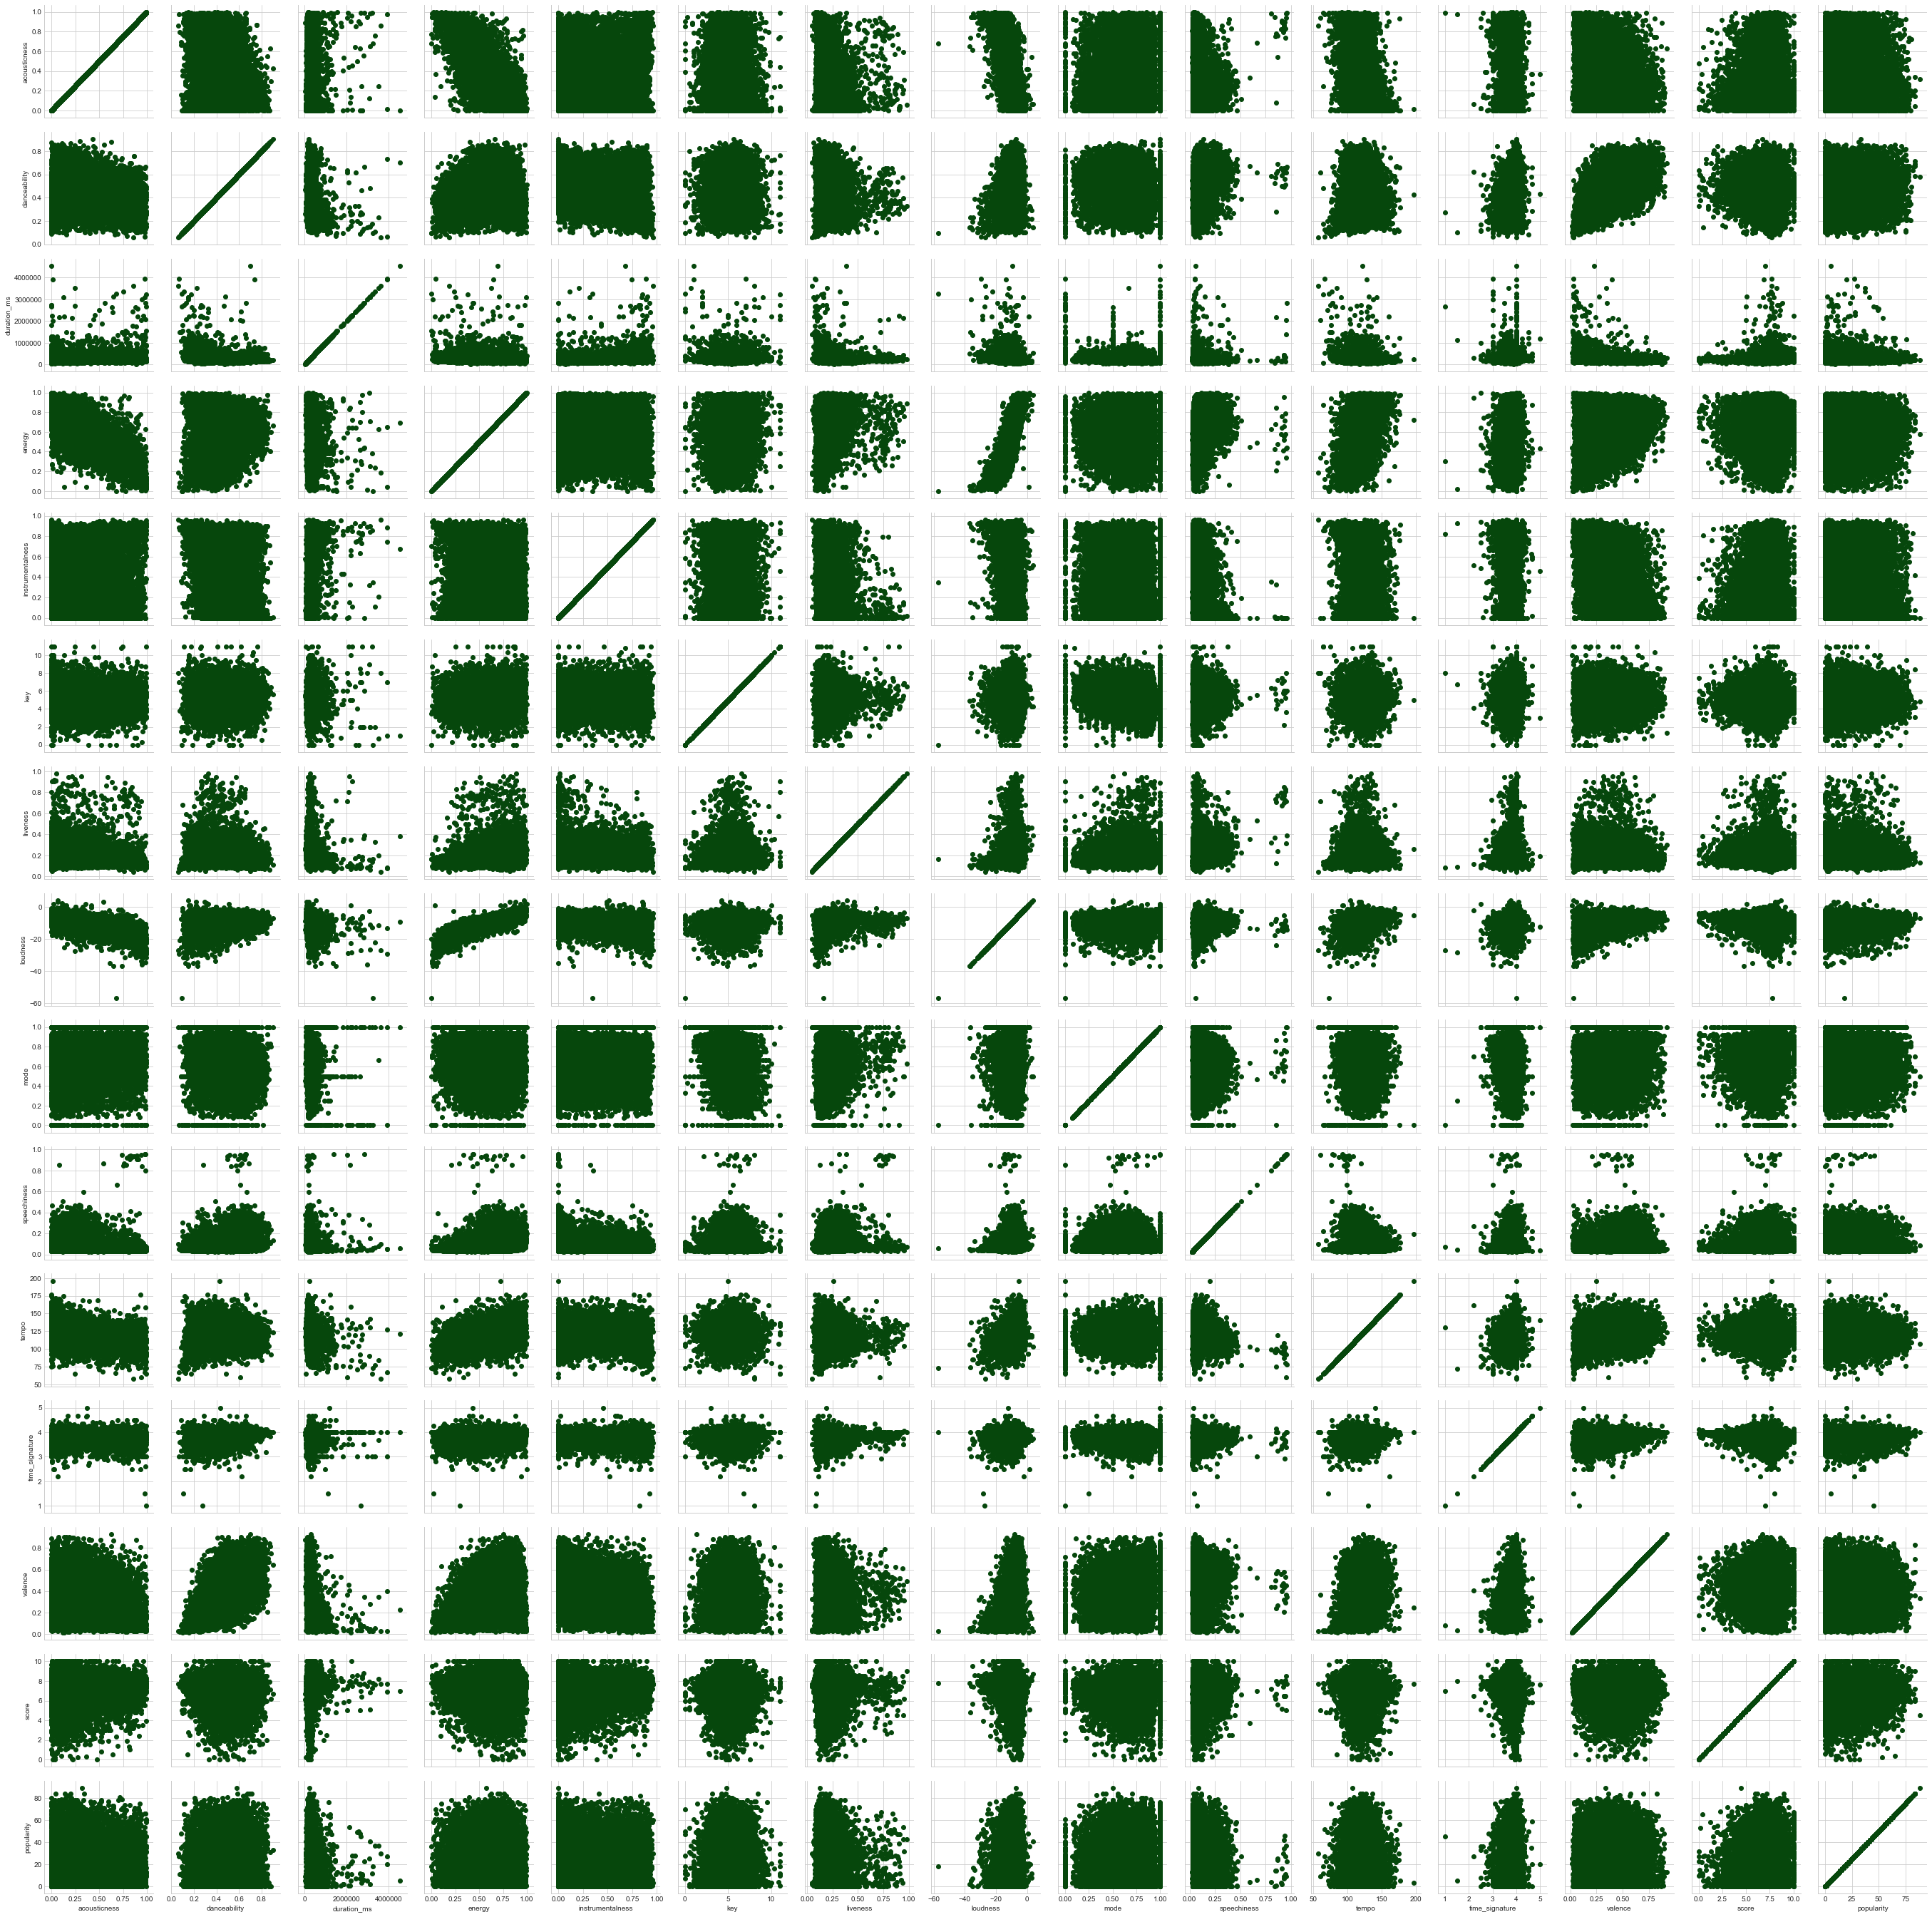

In [56]:
g = sns.PairGrid(df_features)
g.map(plt.scatter, color = sns.xkcd_rgb['forest green']);

#### Zooming into a pairgrid plot

Later, an automated search will be performed to search for statistically significant correlations from the pairgrid above. In the meantime, selecting a an interesting plot for closer inspection.

##### Loudness vs. Energy

Nice psychometric curve trend. Makes sense that with greater loudness, there tends to be a higher 'energy' evaluation.

Spotify definitions:
- <b>Energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- <b>Loudness</b>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

c:\users\diana\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


array([nan, nan])

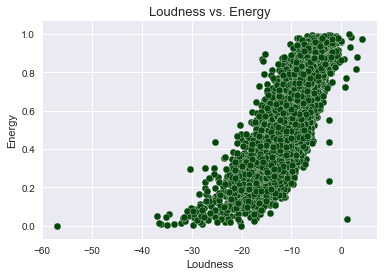

In [88]:
x = df_features['loudness']
y = df_features['energy']

plt.scatter(x, y, edgecolors='white', color = sns.xkcd_rgb['forest green'])
plt.xlabel('Loudness');
plt.ylabel('Energy');
plt.title('Loudness vs. Energy', fontsize=13);

# fitting log model
np.polyfit(np.log(x), y, 1)